# Anisotropic AVO equations

I will show two equations to compute the reflectivity variations with angle of incidence for anisotropic media.

For more information see also:

* [Agilegeo's post on anisotropy](https://www.agilegeoscience.com/blog/2015/2/9/what-is-anisotropy)
* [Agilegeo's post on Blangy's equation](https://www.agilegeoscience.com/blog/2014/8/7/the-blangy-equation.html)

Anisotropy is defined by the two Thomsen's parameters, $\epsilon$ and $\delta$ which are explained in layman's terms as:

*  $\epsilon$: is the fractional difference between vertical and horizontal velocity, and usually  $\epsilon > 0$ (which means that acoustic waves travel fastr horizontally than vertically). It is known as the _long offset term_ as it only becomes relevant at large offsets.
* $\delta$: is the most important anisotropy parameter, it is indipendent of horizontal velocity and dominates at short offsets (therefore it is also called the _short offset term_). It can be either positive or negative.

I will use the equation introduced by Blangy (1994) and Ruger (1997). The first one was coded by the nice folks over at AgileGeo and copied directly from their [bruges](https://www.agilegeoscience.com/bruges/) library. The second one I'm afraid I've coded it myself, and you'll never know the two hours of despair when my results weren't matching what was shown in the article; could I possibly be so stupid and not being able to simply transcribe a (simple) equation? Read on and see it for yourself.

## TO-DO

add crossplot eps-delta from this:

<https://www.agilegeoscience.com/blog/2015/10/5/the-rock-property-catalog-again>


### (proper) references

I mean, the two posts on the agilegeo's blog are enough, but these are the original scientific papers you need at least to know they exist:

Blangy, J. P., 1994, AVO in transversely isotropic media An overview: Geophysics, v. 59, no. 5, p. 775–781.

Rüger, A., 1997, P -wave reflection coefficients for transversely isotropic models with vertical and horizontal axis of symmetry: Geophysics, v. 62, no. 3, p. 713–722.



In [1]:
def blangy(vp1,vs1,rho1,d1,e1,vp2,vs2,rho2,d2,e2,theta):
    inc_angle = np.radians(theta)
    trans_angle = np.arcsin(np.sin(inc_angle) * vp2/vp1)
    theta = 0.5 * (inc_angle + trans_angle)
    vp  = (vp1 + vp2)/2.0
    vs  = (vs1 + vs2)/2.0
    rho  = (rho1 + rho2)/2.0
    dvp = vp2-vp1
    dvs = vs2-vs1
    drho = rho2-rho1
    dd = d2-d1
    de = e2-e1
    A = 0.5 * (drho/rho + dvp/vp)
    B = 2.0 * (vs**2 / vp**2) * ((drho/rho + 2 * dvs/vs)) * np.sin(theta)**2
    C = 0.5 * (dvp/vp) * np.tan(theta)**2
    D = 0.5 * dd * np.sin(theta)**2
    E = 0.5 * (dd - de) * np.sin(theta)**2 * np.tan(theta)**2
    isotropic = A - B + C
    anisotropic = A - B + C + D - E
    return isotropic, anisotropic, (A, -B, C, D, -E)

def ruger(vp1,vs1,rho1,d1,e1,vp2,vs2,rho2,d2,e2,theta):
    a = np.radians(theta)
    vp  = np.mean([vp1,vp2])
    vs  = np.mean([vs1,vs2])
    rho = np.mean([rho1,rho2])
    z   = np.mean([vp1*rho1,vp2*rho2])
    g   = np.mean([rho1*vs1**2,rho2*vs2**2])
    dvp = vp2-vp1
    dvs = vs2-vs1
    drho= rho2-rho1
    z2, z1 = vp2*rho2, vp1*rho1
    dz  = z2-z1
    dg  = rho2*vs2**2 - rho1*vs1**2
    dd = d2-d1
    de = e2-e1
    A = 0.5*(dz/z)
    B = 0.5*(dvp/vp - (2*vs/vp)**2 * (dg/g) + dd) * np.sin(a)**2
    C = 0.5*(dvp/vp + de) * np.sin(a)**2 * np.tan(a)**2
    R = A+B+C
    return R

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from bruges.reflection import zoeppritz
import bruges as b
from IPython.display import Image

%matplotlib inline
# comment out the following if you're not on a Mac with HiDPI display
%config InlineBackend.figure_format = 'retina'

## reproducing Ruger's figures from his PhD thesis

(it works!)

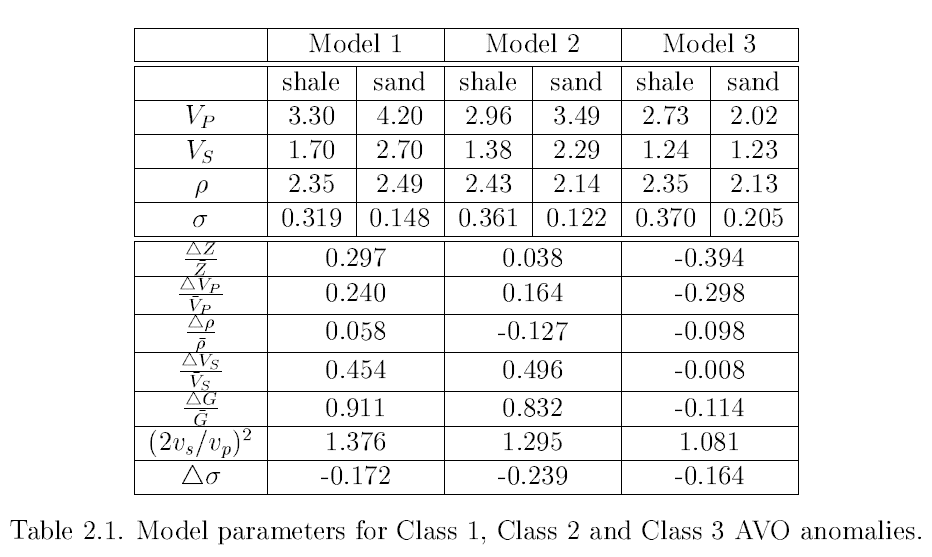

In [9]:
Image(filename='Ruger_1996_pag16_table2-1.png', width=1200, retina=True)

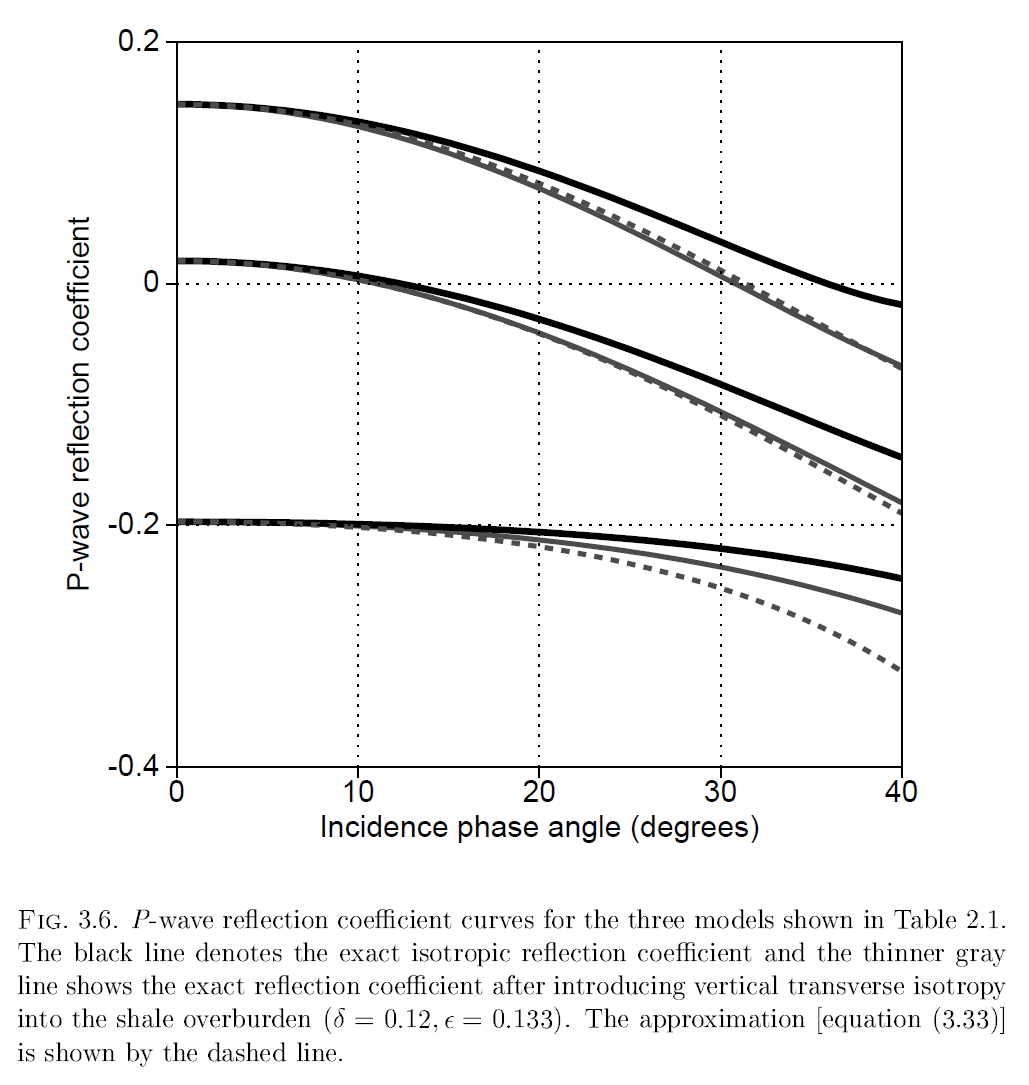

In [6]:
Image(filename='Ruger_1996_pag38_fig3-6.png', width=1200, retina=True)

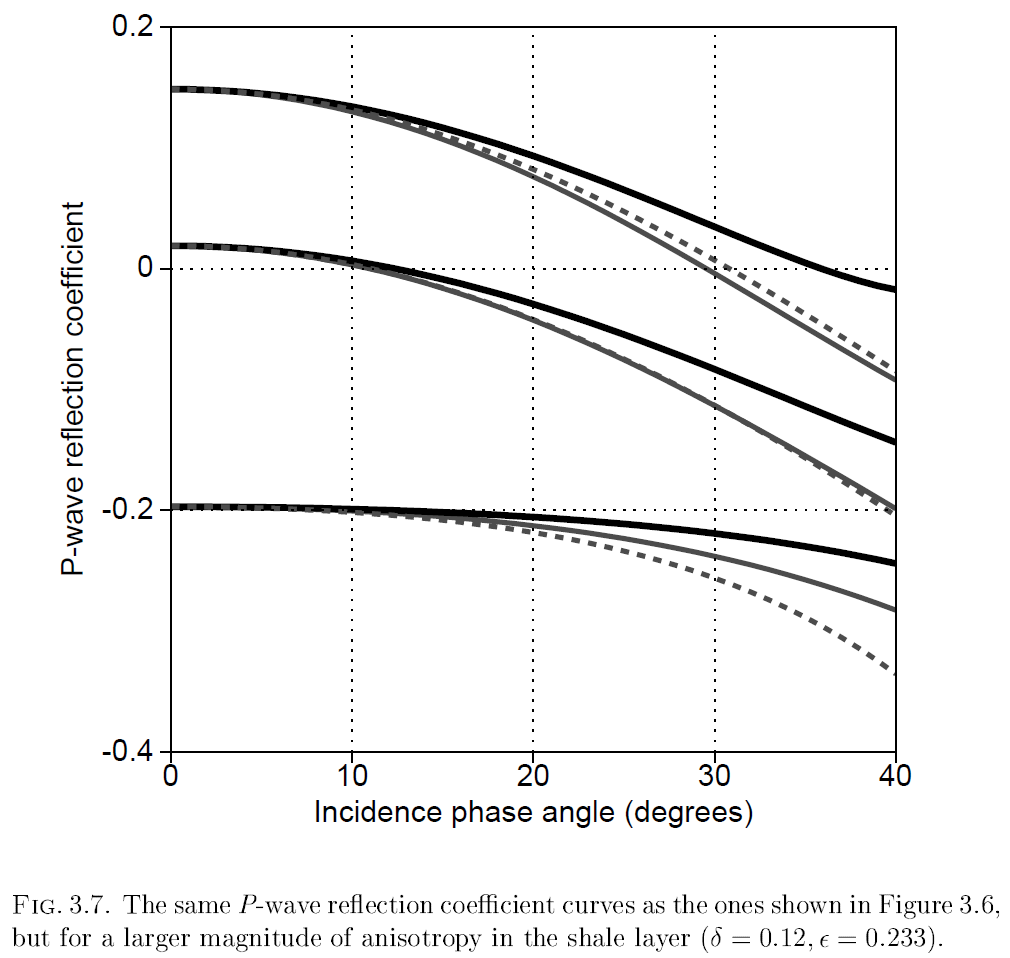

In [7]:
Image(filename='Ruger_1996_pag39_fig3-7.png', width=1200, retina=True)

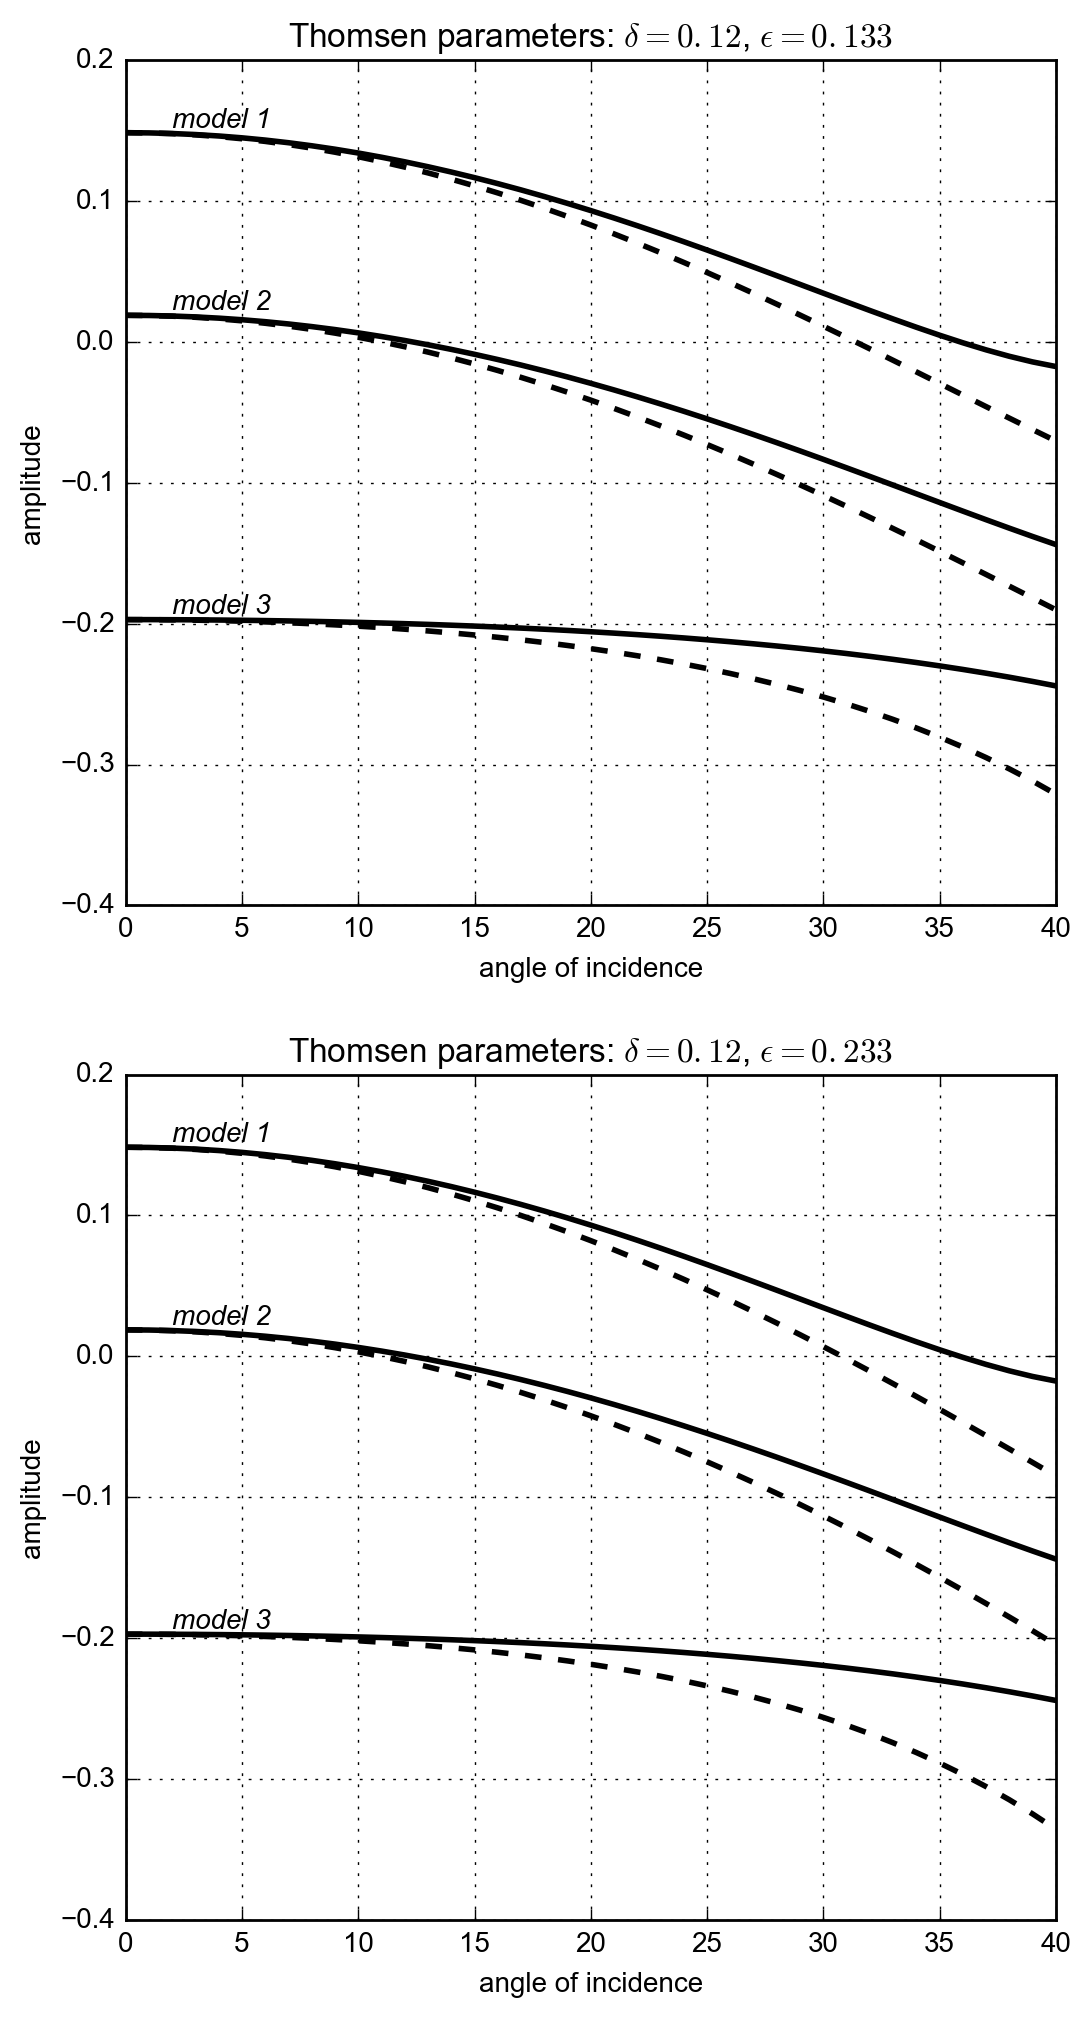

In [33]:
ang=np.arange(0,41,1)

names=['model 1','model 2','model 3']
shale = np.array([[3.3,1.7,2.35],[2.96,1.38,2.43],[2.73,1.24,2.35]])
sand = np.array([[4.2,2.7,2.49],[3.49,2.29,2.14],[2.02,1.23,2.13]])

f,ax=plt.subplots(nrows=2, ncols=1, figsize=(6,12))
plt.figure()
for i in range(3):
    rcz=zoeppritz(shale[i,0],shale[i,1],shale[i,2],sand[i,0],sand[i,1],sand[i,2],ang)
    thoms_d,thoms_e = 0.12, 0.133
    rcr=ruger(shale[i,0],shale[i,1],shale[i,2],thoms_d,thoms_e,sand[i,0],sand[i,1],sand[i,2],0,0,ang)
    
    ax[0].plot(ang, rcr, '--k',lw=2)
    ax[0].set_title(r'Thomsen parameters: $\delta={}$, $\epsilon={}$'.format(thoms_d,thoms_e))
    ax[0].plot(ang, rcz, '-k',lw=2)
    
    thoms_d,thoms_e = 0.12, 0.233
    rcr=ruger(shale[i,0],shale[i,1],shale[i,2],thoms_d,thoms_e,sand[i,0],sand[i,1],sand[i,2],0,0,ang)
    ax[1].plot(ang, rcr, '--k',lw=2)
    ax[1].set_title(r'Thomsen parameters: $\delta={}$, $\epsilon={}$'.format(thoms_d,thoms_e))
    ax[1].plot(ang, rcz, '-k',lw=2)
    for aa in ax:
        aa.grid()
        aa.set_xlabel('angle of incidence'), aa.set_ylabel('amplitude')
        aa.set_ylim(-.4, .2)
        aa.text(2,rcz[0],names[i], style='italic', fontsize=10, ha='left', va='bottom')

## reproducing Ruger's figures from his 1997 Geophysics article

(not sure if it's ok, vertical scale looks funny)

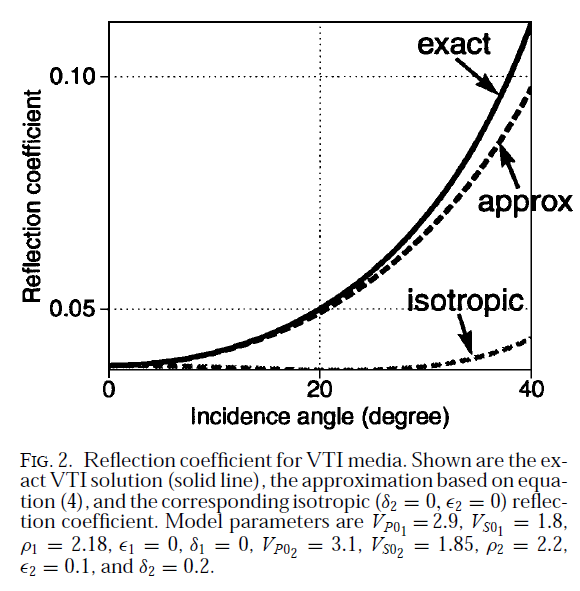

In [14]:
Image(filename='Ruger_1997_fig2.png', width=400)

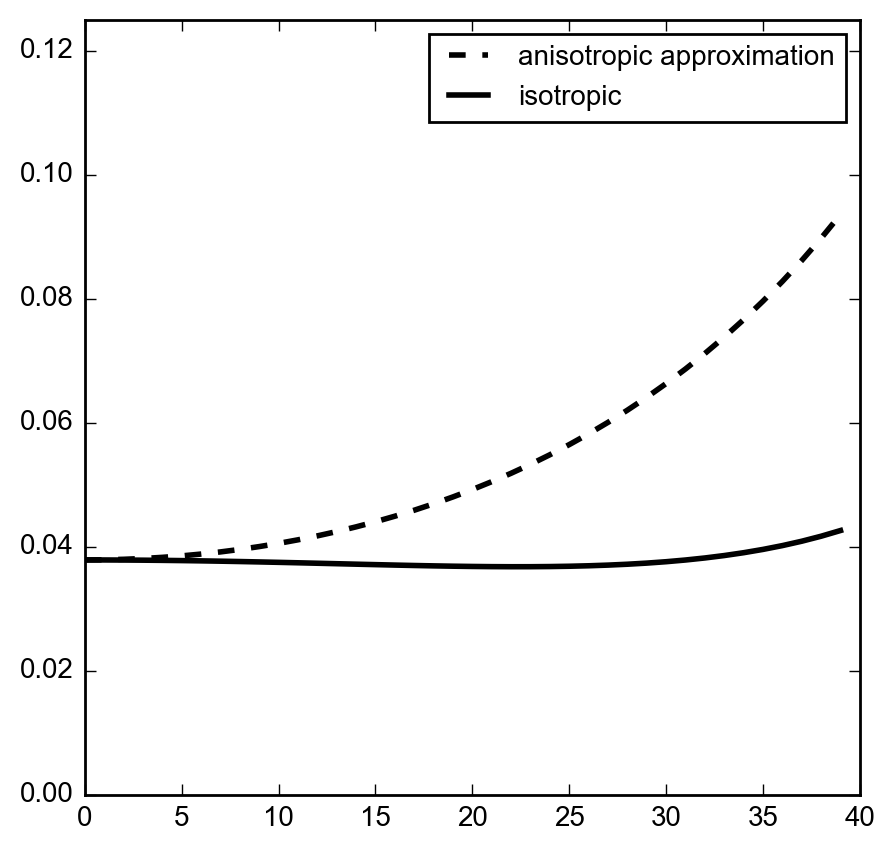

In [49]:
# ruger 1997, fig 2, p715
ang=np.arange(0,40,1)
rc=ruger(2900,1800,2.18,0,0,3100,1850,2.2,0.2,0.1,ang)
rcz=zoeppritz(2900,1800,2.18,3100,1850,2.2,ang)

plt.figure(figsize=(5,5))
plt.plot(ang,rc,'--k', lw=2, label='anisotropic approximation')
plt.plot(ang,rcz,'-k', lw=2, label='isotropic')
plt.ylim(0,0.125)
plt.legend(fontsize='medium')

## reproducing figure from Simm & Bacon's book

* add photo of page 86, fig. 5.45

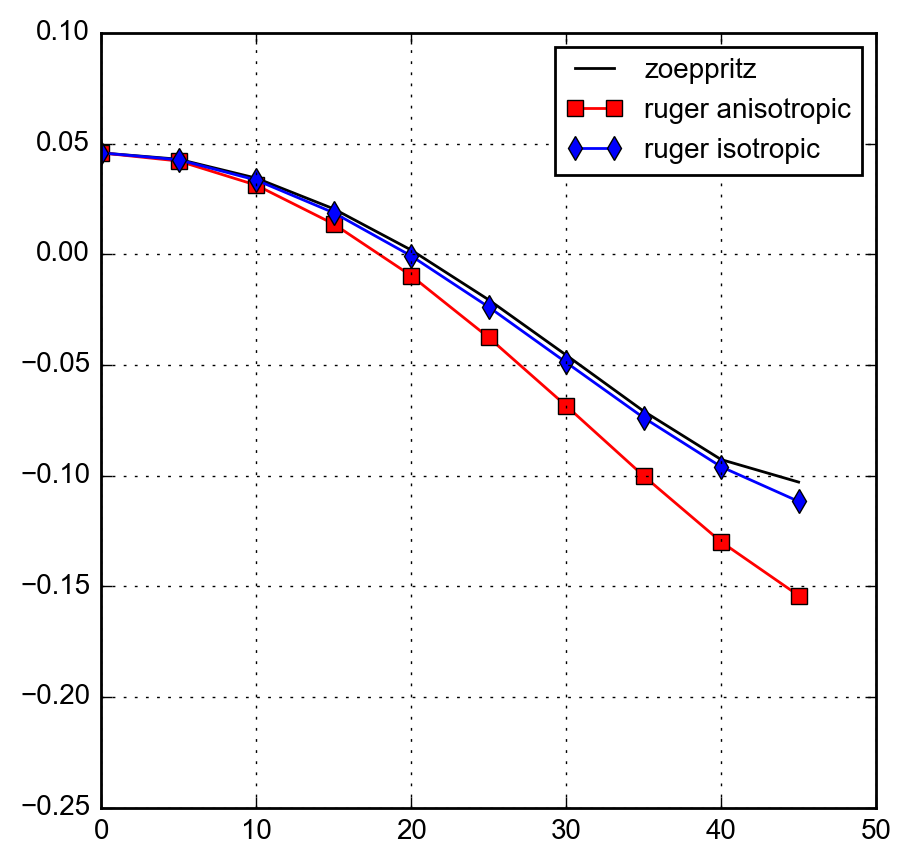

In [51]:
# simm & bacon, seismic amplitude, pag. xxx
ang=np.arange(0,50,5)
rc=zoeppritz(2438,1006,2.25,2953,1774,2.036,ang)
rc0=ruger(2438,1006,2.25,0.15,0.02,2953,1774,2.036,0.,0.,ang)
rc1=ruger(2438,1006,2.25,0.00,0.00,2953,1774,2.036,0.,0.,ang)

plt.figure(figsize=(5,5))
plt.plot(ang,rc,'-k', label='zoeppritz')
plt.plot(ang,rc0,'-sr', label='ruger anisotropic')
plt.plot(ang,rc1,'-db', label='ruger isotropic')
plt.ylim(-0.25,0.1), plt.xlim(0,50)
plt.grid()
plt.legend(fontsize='medium')